# US metro-area housing market in the 21st century  

## Group 8

Group members:
*   Matthew Hockert
*   Mohammed Guiga
*   Subhankar Ghosh
*   Zhecheng Sheng


# Data Extraction and Cleaning

In [108]:
import pandas as pd
import csv
import sqlite3

pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', None)

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Data Aquisition

The data being used was downloaded from the following location:

https://www.zillow.com/research/data/

The data will be stored in a pandas **`DataFrame`**, which functions similarly to a relational data table.

In [109]:
home_values = pd.read_csv("/content/drive/Shareddrives/CSCI 5707 Group 8/Project/Zillow Data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
rentals = pd.read_csv("/content/drive/Shareddrives/CSCI 5707 Group 8/Project/Zillow Data/Metro_ZORI_AllHomesPlusMultifamily_SSA.csv")
inventory = pd.read_csv("/content/drive/Shareddrives/CSCI 5707 Group 8/Project/Zillow Data/Metro_invt_fs_uc_sfrcondo_sm_month.csv")
list_and_sale_prices = pd.read_csv("/content/drive/Shareddrives/CSCI 5707 Group 8/Project/Zillow Data/Metro_mlp_uc_sfrcondo_sm_month.csv")
sales_count_and_price_cuts = pd.read_csv("/content/drive/Shareddrives/CSCI 5707 Group 8/Project/Zillow Data/Metro_perc_listings_price_cut_uc_sfrcondo_sm_month.csv")

### Data description


**home value (ZHVI):**
A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. The raw version of that mid-tier ZHVI time series is also available.

Zillow publishes top-tier ZHVI (dollars, typical value for homes within the 65th to 95th percentile range for a given region) and bottom-tier ZHVI ($, typical value for homes that fall within the 5th to 35th percentile range for a given region).

Zillow also publishes ZHVI for all single-family residences ($, typical value for all single-family homes in a given region), for condo/coops (dollars), for all homes with 1, 2, 3, 4 and 5+ bedrooms (dollars), and the ZHVI per square foot (dollars, typical value of all homes per square foot calculated by taking the estimated home value for each home in a given region and dividing it by the home’s square footage). Check out this [overview of ZHVI](https://www.zillow.com/research/zhvi-methodology-2019-highlights-26221/) and a [deep-dive into its methodology](https://www.zillow.com/research/zhvi-methodology-2019-deep-26226/). 

Here’s a handy [ZHVI](https://www.zillow.com/research/zhvi-user-guide/) User Guide for information about properly citing and making calculations with this metric.


**rentals (ZORI):** A smoothed measure of the typical observed market rate rent across a given region. ZORI is a repeat-rent index that is weighted to the rental housing stock to ensure representativeness across the entire market, not just those homes currently listed for-rent. The index is dollar-denominated by computing the mean of listed rents that fall into the 40th to 60th percentile range for all homes and apartments in a given region, which is once again weighted to reflect the rental housing stock. Details available in [ZORI methodology](https://www.zillow.com/research/methodology-zori-repeat-rent-27092/).

**For-Sale Inventory:** The count of unique listings that were active at any time in a given month.

**Median List Price:** The median price at which homes across various geographies were listed.

**Share of Listings With a Price Cut:** The number of unique properties with a list price at the end of the month that’s less than the list price at the beginning of the month, divided by the number of unique properties with an active listing at some point during the month.

## HOME VALUES

In [110]:
#thinking of ways we would want to merge all the data.
# a few options come to mind:
#1. can merge based on type
#2. Merge on Region ID
#3. merge on time.

# Variable selections
# We consider only using data after 2018-1, because some datasets from Zillow only contains data after 2018

df = pd.DataFrame(home_values)
df.insert(1, 'Type', 'home_values')
df.iloc[: , :10].head()

,RegionID,Type,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30
0,102001,home_values,0,United States,Country,NaN,127566.0,127911.0,128274.0,129013.0
1,394913,home_values,1,"New York, NY",Msa,NY,225655.0,227004.0,228217.0,230605.0
2,753899,home_values,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231144.0,231949.0,233181.0,235525.0
3,394463,home_values,3,"Chicago, IL",Msa,IL,171442.0,171847.0,172370.0,173418.0
4,394514,home_values,4,"Dallas-Fort Worth, TX",Msa,TX,130465.0,130569.0,130656.0,130868.0


In [111]:
#removing dates
df.drop(df.columns[6:222], axis=1, inplace=True)
df.iloc[: , :10].head()

,RegionID,Type,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30
0,102001,home_values,0,United States,Country,NaN,227448.0,228821.0,230157.0,231478.0
1,394913,home_values,1,"New York, NY",Msa,NY,458229.0,460849.0,463808.0,466847.0
2,753899,home_values,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,640218.0,645391.0,650415.0,654963.0
3,394463,home_values,3,"Chicago, IL",Msa,IL,234512.0,235877.0,236683.0,237171.0
4,394514,home_values,4,"Dallas-Fort Worth, TX",Msa,TX,235550.0,237552.0,239511.0,241051.0


## RENTALS

In [112]:
dfr = pd.DataFrame(rentals)
#creating a type column
dfr.insert(1, 'Type', 'rental_rate')


In [113]:
#removing dates before 2018
dfr.drop(dfr.columns[4:52], axis=1, inplace=True)

dfr.iloc[: , :10].head()

,RegionID,Type,RegionName,SizeRank,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
0,102001,rental_rate,United States,0,1552,1557,1561,1566,1571,1576
1,394913,rental_rate,"New York, NY",1,2523,2526,2529,2532,2536,2540
2,753899,rental_rate,"Los Angeles-Long Beach-Anaheim, CA",2,2215,2222,2230,2238,2246,2254
3,394463,rental_rate,"Chicago, IL",3,1596,1599,1601,1604,1606,1609
4,394514,rental_rate,"Dallas-Fort Worth, TX",4,1340,1343,1347,1350,1354,1358


INVENTORY

In [114]:
dfi = pd.DataFrame(inventory)
#creating a type column
dfi.insert(1, 'Type', 'inventory_counts')


In [115]:
#removing dates before 2018
dfi.iloc[: , :10].head()

,RegionID,Type,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30
0,102001,inventory_counts,0,United States,Country,NaN,1.43e+06,1.39e+06,1.44e+06,1.53e+06
1,394913,inventory_counts,1,"New York, NY",Msa,NY,6.90e+04,6.86e+04,7.31e+04,8.00e+04
2,753899,inventory_counts,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,2.01e+04,1.99e+04,2.19e+04,2.38e+04
3,394463,inventory_counts,3,"Chicago, IL",Msa,IL,4.28e+04,4.12e+04,4.48e+04,4.94e+04
4,394514,inventory_counts,4,"Dallas-Fort Worth, TX",Msa,TX,2.43e+04,2.32e+04,2.43e+04,2.68e+04


In [116]:
dflsp = pd.DataFrame(list_and_sale_prices)
#creating a type column
dflsp.insert(1, 'Type', 'listing_price')


In [117]:
dflsp.iloc[: , :10].head()

,RegionID,Type,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30
0,102001,listing_price,0,United States,Country,NaN,271600.0,272967.0,279333.0,288667.0
1,394913,listing_price,1,"New York, NY",Msa,NY,517967.0,523000.0,534333.0,544667.0
2,753899,listing_price,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,798333.0,802633.0,817967.0,834967.0
3,394463,listing_price,3,"Chicago, IL",Msa,IL,301000.0,305967.0,319300.0,335967.0
4,394514,listing_price,4,"Dallas-Fort Worth, TX",Msa,TX,341996.0,345330.0,351663.0,359830.0


In [118]:
### sales_count_and_price_cuts.head()
### do not use this dataset for now

In [119]:
import re

In [120]:
### create a combined dataset
### unified column names
all_housing = pd.concat([df, dfi, dflsp], axis = 0)
date_names = all_housing.columns[6:]
new_date = [re.sub('-\d+$','',x) for x in date_names]
new_date[1:10]

['2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10']

In [121]:
new_col= all_housing.columns.values
new_col[6:] = new_date
all_housing.columns = new_col

In [122]:
## join with rentals
## rentals are missing two columns
dfr = dfr.merge(all_housing.iloc[:,3:6], on = 'RegionName', how = 'left')
all_housing = pd.concat([all_housing, dfr], axis = 0)

In [123]:
### remove duplicate rows
all_housing.drop_duplicates(inplace=True)
### assign statenames to US
all_housing.loc[all_housing['RegionName']=='United States',['StateName']] = 'Nationwide'

In [124]:
### creating statistic columns
all_housing['sum'] = all_housing.iloc[:,6:].sum(axis=1)
all_housing['mean'] = all_housing.iloc[:,6:].mean(axis=1)

In [125]:
#### final_shape
all_housing.shape
all_housing.to_csv("/content/drive/Shareddrives/CSCI 5707 Group 8/Project/final_housing_data.csv")

In [126]:
all_housing


,RegionID,Type,SizeRank,RegionName,RegionType,StateName,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,sum,mean
0,102001,home_values,0,United States,Country,Nationwide,227448.0,228821.0,230157.0,231478.0,232698.0,233814.0,234849.0,235829.0,236808.0,237775.0,238752.0,239747.0,240769.0,241712.0,242523.0,243223.0,243871.0,244474.0,245027.0,245587.0,246222.0,246937.0,247674.0,248503.0,249490.0,250637.0,251926.0,253150.0,254000.0,254708.0,255810.0,257731.0,260247.0,263073.0,266106.0,269158.0,272126.0,275240.0,278586.0,282328.0,286906.0,292296.0,298061.0,303288.0,1.11e+07,4.94e+05
1,394913,home_values,1,"New York, NY",Msa,NY,458229.0,460849.0,463808.0,466847.0,469232.0,470893.0,471606.0,472311.0,473496.0,475198.0,477051.0,478622.0,479640.0,480521.0,481423.0,482430.0,483119.0,483318.0,483286.0,483012.0,482544.0,482005.0,481708.0,482249.0,483283.0,484768.0,486193.0,487692.0,488506.0,489065.0,490287.0,492890.0,497418.0,502932.0,508991.0,514847.0,519694.0,524467.0,528751.0,533497.0,538959.0,546165.0,554085.0,561677.0,2.17e+07,9.63e+05
2,753899,home_values,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,640218.0,645391.0,650415.0,654963.0,657513.0,660378.0,660811.0,661688.0,662138.0,665394.0,667247.0,666736.0,665576.0,663427.0,662085.0,661654.0,662622.0,663639.0,662704.0,663429.0,666141.0,670441.0,672453.0,674263.0,677238.0,683334.0,690294.0,695416.0,693507.0,690608.0,692349.0,701518.0,712131.0,722093.0,729581.0,735915.0,741022.0,748618.0,756229.0,767381.0,782911.0,803088.0,823792.0,837312.0,3.06e+07,1.36e+06
3,394463,home_values,3,"Chicago, IL",Msa,IL,234512.0,235877.0,236683.0,237171.0,237627.0,238064.0,238478.0,238779.0,239432.0,239938.0,240719.0,241342.0,241880.0,242627.0,243096.0,243607.0,243666.0,243593.0,243553.0,243483.0,243480.0,243371.0,243379.0,243594.0,244078.0,244691.0,245224.0,245352.0,245183.0,245154.0,246173.0,247850.0,250757.0,253635.0,256458.0,258700.0,260180.0,262503.0,264616.0,267679.0,270431.0,274239.0,278451.0,282568.0,1.09e+07,4.85e+05
4,394514,home_values,4,"Dallas-Fort Worth, TX",Msa,TX,235550.0,237552.0,239511.0,241051.0,242216.0,243342.0,244326.0,245541.0,246554.0,247639.0,248692.0,250007.0,251718.0,252852.0,253493.0,253536.0,253659.0,253661.0,253735.0,254432.0,255590.0,256149.0,256400.0,256295.0,257298.0,258243.0,259500.0,260114.0,260528.0,261135.0,262189.0,264544.0,267142.0,270244.0,272628.0,275228.0,277513.0,280956.0,284971.0,290501.0,296878.0,304143.0,311928.0,320045.0,1.15e+07,5.12e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,394549,rental_rate,104,"Durham, NC",Msa,NC,1277.0,1281.0,1284.0,1287.0,1291.0,1294.0,1298.0,1302.0,1307.0,1311.0,1316.0,1321.0,1326.0,1331.0,1336.0,1341.0,1345.0,1349.0,1353.0,1356.0,1359.0,1362.0,1363.0,1364.0,1365.0,1366.0,1367.0,1367.0,1370.0,1372.0,1374.0,1377.0,1381.0,1384.0,1393.0,1401.0,1410.0,1419.0,1429.0,1439.0,1448.0,1458.0,1468.0,1479.0,5.98e+04,2.66e+03
289,394995,rental_rate,119,"Port St. Lucie, FL",Msa,FL,1446.0,1454.0,1462.0,1469.0,1477.0,1485.0,1492.0,1499.0,1505.0,1511.0,1516.0,1521.0,1525.0,1530.0,1536.0,1541.0,1547.0,1553.0,1560.0,1567.0,1573.0,1580.0,1586.0,1592.0,1598.0,1605.0,1612.0,1619.0,1629.0,1639.0,1648.0,1662.0,1676.0,1690.0,1713.0,1737.0,1761.0,1786.0,1810.0,1835.0,1860.0,1885.0,1911.0,1937.0,7.11e+04,3.16e+03
290,394602,rental_rate,159,"Fort Collins, CO",Msa,CO,1419.0,1424.0,1428.0,1432.0,1436.0,1440.0,1444.0,1449.0,1454.0,1458.0,1462.0,1466.0,1470.0,1474.0,1478.0,1481.0,1485.0,1489.0,1493.0,1496.0,1500.0,1503.0,1506.0,1509.0,1512.0,1514.0,1516.0,1518.0,1521.0,1523.0,1525.0,1530.0,1534

In [127]:
all_housing["id"] = all_housing.index
all_housing['id']

0        0
1        1
2        2
3        3
4        4
      ... 
286    286
289    289
290    290
293    293
294    294
Name: id, Length: 1204, dtype: int64

In [128]:
#This is incredibly janky but it works
test = all_housing.melt(id_vars=['id','RegionID','RegionName','StateName','Type'], value_vars=['2018-01',	'2018-02',	'2018-03',	'2018-04',	'2018-05',	'2018-06',	'2018-07',	'2018-08',	'2018-09',	'2018-11',	'2018-12',	'2019-01',	'2019-02',	'2019-03',
                                                    '2019-04',	'2019-05',	'2019-06',	'2019-07',	'2019-08',	'2019-09',	'2019-10',	'2019-11',	'2019-12',	'2020-01',	'2020-02',	'2020-03',	'2020-04',	'2020-05',	'2020-06',
                                                    '2020-07',	'2020-08',	'2020-09',	'2020-10',	'2020-11',	'2020-12',	'2021-01',	'2021-02',	'2021-03',	'2021-04',	'2021-05',	'2021-06',	'2021-07',	'2021-08'	])
test

,id,RegionID,RegionName,StateName,Type,variable,value
0,0,102001,United States,Nationwide,home_values,2018-01,227448.0
1,1,394913,"New York, NY",NY,home_values,2018-01,458229.0
2,2,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-01,640218.0
3,3,394463,"Chicago, IL",IL,home_values,2018-01,234512.0
4,4,394514,"Dallas-Fort Worth, TX",TX,home_values,2018-01,235550.0
...,...,...,...,...,...,...,...
51767,286,394549,"Durham, NC",NC,rental_rate,2021-08,1479.0
51768,289,394995,"Port St. Lucie, FL",FL,rental_rate,2021-08,1937.0
51769,290,394602,"Fort Collins, CO",CO,rental_rate,2021-08,1639.0
51770,293,394405,"Boulder, CO",CO,rental_rate,2021-08,2077.0


## Extracting and Loading new data


In [129]:
regionIDMap = pd.read_csv("/content/drive/Shareddrives/CSCI 5707 Group 8/Project/new/CountyCrossWalk_Zillow.csv")

In [130]:
regionIDMap.head()

,CountyName,StateName,StateFIPS,CountyFIPS,MetroName_Zillow,CBSAName,CountyRegionID_Zillow,MetroRegionID_Zillow,FIPS,CBSACode
0,Pike,Pennsylvania,42,103,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",280,394913.0,42103,35620.0
1,Bronx,New York,36,5,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",401,394913.0,36005,35620.0
2,Essex,New Jersey,34,13,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",504,394913.0,34013,35620.0
3,Kings,New York,36,47,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",581,394913.0,36047,35620.0
4,Ocean,New Jersey,34,29,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",659,394913.0,34029,35620.0


In [131]:
new_data = pd.read_excel("/content/drive/Shareddrives/CSCI 5707 Group 8/Project/new/ssamatab1.xlsx", header=2, skipfooter=5)

In [132]:
# Drop first row (all NaN)
new_data.drop(index=new_data.index[0], 
        axis=0, 
        inplace=True)

In [133]:
new_data.tail()

,LAUS Code,State FIPS Code,Area FIPS Code,Area,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
151268,MT7225020000000,72.0,25020.0,"Guayama, PR MSA",2021.0,10.0,19963,18162,1801,9
151269,MT7232420000000,72.0,32420.0,"Mayaguez, PR MSA",2021.0,10.0,27109,24650,2459,9.1
151270,MT7238660000000,72.0,38660.0,"Ponce, PR MSA",2021.0,10.0,91692,82472,9220,10
151271,MT7241900000000,72.0,41900.0,"San German, PR MSA",2021.0,10.0,35689,32196,3493,9.8
151272,MT7241980000000,72.0,41980.0,"San Juan-Carolina-Caguas, PR MSA",2021.0,10.0,729003,676328,52675,7.2


## Inserting cleaned data into sqlite tables

In [134]:
conn = sqlite3.connect('zillow.db')
cur = conn.cursor()

In [135]:
all_housing.columns

Index(['RegionID', 'Type', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', 'sum', 'mean', 'id'],
      dtype='object')

In [136]:
all_housing.to_sql(name='all_housing', con=conn, if_exists='replace')

In [137]:
regionIDMap.to_sql(name='regionIDMap', con=conn, if_exists='replace')

In [138]:
new_data.to_sql(name='new_data', con=conn, if_exists='replace')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning:

The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.



In [139]:
query = '''
            SELECT name FROM PRAGMA_TABLE_INFO('new_data');
        ''' 

result = conn.execute(query)

for row in result:
  print(row)



('index',)
('LAUS Code',)
('State FIPS Code',)
('Area FIPS Code',)
('Area',)
('Year',)
('Month',)
('Civilian Labor Force',)
('Employment',)
('Unemployment',)
('Unemployment Rate',)


In [140]:
query = '''
            SELECT name FROM PRAGMA_TABLE_INFO('regionIDMap');
        ''' 

result = conn.execute(query)

for row in result:
  print(row)


('index',)
('CountyName',)
('StateName',)
('StateFIPS',)
('CountyFIPS',)
('MetroName_Zillow',)
('CBSAName',)
('CountyRegionID_Zillow',)
('MetroRegionID_Zillow',)
('FIPS',)
('CBSACode',)


### Join the region ID map in order to get the zillow region id codes

In [141]:
query1 = '''
            DROP TABLE IF EXISTS new_data_zillow_id;
         '''

query2 = '''
            CREATE TABLE new_data_zillow_id AS
            SELECT DISTINCT nd.*, rid.MetroRegionID_Zillow
            FROM new_data nd
            INNER JOIN regionIDMap rid ON nd.[Area FIPS Code] = rid.CBSACode;
        ''' 

conn.execute(query1)
conn.execute(query2)

In [142]:
query1 =  '''
              SELECT count(*)
              FROM new_data;
          ''' 
query2 =  '''
              SELECT count(*)
              FROM new_data_zillow_id;
          ''' 
          
result1 = conn.execute(query1)
result2 = conn.execute(query2)

for row in result1:
  print(row)
for row in result2:
  print(row)

# lost 10,696 records where a mapping was not found

(151272,)
(140576,)


In [143]:
query1 =  '''
              SELECT name FROM PRAGMA_TABLE_INFO('new_data_zillow_id');
          ''' 
query2 =  '''
              SELECT *
              FROM new_data_zillow_id
              LIMIT 10;
          ''' 

result1 = conn.execute(query1)
result2 = conn.execute(query2)

for row in result1:
  print(row)

for row in result2:
  print(row)

('index',)
('LAUS Code',)
('State FIPS Code',)
('Area FIPS Code',)
('Area',)
('Year',)
('Month',)
('Civilian Labor Force',)
('Employment',)
('Unemployment',)
('Unemployment Rate',)
('MetroRegionID_Zillow',)
(1, 'MT0111500000000', 1.0, 11500.0, 'Anniston-Oxford-Jacksonville, AL MSA', 1990.0, 1.0, '51709', '48084', '3625', '7', 394333.0)
(2, 'MT0112220000000', 1.0, 12220.0, 'Auburn-Opelika, AL MSA', 1990.0, 1.0, '44426', '41104', '3322', '7.5', 394351.0)
(3, 'MT0113820000000', 1.0, 13820.0, 'Birmingham-Hoover, AL MSA', 1990.0, 1.0, '460283', '435924', '24359', '5.3', 394388.0)
(4, 'MT0119300000000', 1.0, 19300.0, 'Daphne-Fairhope-Foley, AL MSA', 1990.0, 1.0, '46320', '43881', '2439', '5.3', 394519.0)
(5, 'MT0119460000000', 1.0, 19460.0, 'Decatur, AL MSA', 1990.0, 1.0, '65563', '61215', '4348', '6.6', 394523.0)
(6, 'MT0120020000000', 1.0, 20020.0, 'Dothan, AL MSA', 1990.0, 1.0, '58765', '56329', '2436', '4.1', 394537.0)
(7, 'MT0122520000000', 1.0, 22520.0, 'Florence-Muscle Shoals, AL MSA'

### Insert joined data into a pandas dataframe

In [144]:
query = '''
            SELECT MetroRegionID_Zillow, Area, Year, Month, [Civilian Labor Force], Employment, Unemployment, [Unemployment Rate]
            FROM new_data_zillow_id;
        ''' 

new_df = pd.read_sql(sql=query, con=conn)

In [145]:
new_df.head()

,MetroRegionID_Zillow,Area,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
0,394333.0,"Anniston-Oxford-Jacksonville, AL MSA",1990.0,1.0,51709,48084,3625,7
1,394351.0,"Auburn-Opelika, AL MSA",1990.0,1.0,44426,41104,3322,7.5
2,394388.0,"Birmingham-Hoover, AL MSA",1990.0,1.0,460283,435924,24359,5.3
3,394519.0,"Daphne-Fairhope-Foley, AL MSA",1990.0,1.0,46320,43881,2439,5.3
4,394523.0,"Decatur, AL MSA",1990.0,1.0,65563,61215,4348,6.6


### data exploration using sql queries

In [146]:
query = '''
            SELECT Area, AVG([Unemployment Rate]) as Average
            FROM new_data_zillow_id
            GROUP BY Area
            ORDER BY AVG([Unemployment Rate])
            LIMIT 10 
        ''' 

result = conn.execute(query)

print("(Area, Average Unemployment Rate)")
for row in result:
  print(row)

(Area, Average Unemployment Rate)
('Sioux Falls, SD MSA', 2.7947643979057606)
('Fargo, ND-MN MSA', 2.8816753926701577)
('Lincoln, NE MSA', 2.892146596858639)
('Ames, IA MSA', 2.9259162303664947)
('Iowa City, IA MSA', 3.01675392670157)
('Grand Island, NE MSA', 3.1560209424083747)
('Bismarck, ND MSA', 3.281937172774869)
('Logan, UT-ID MSA', 3.313350785340317)
('Columbia, MO MSA', 3.3217277486911008)
('Madison, WI MSA', 3.3835078534031426)


In [147]:
query = '''
            SELECT *
            FROM all_housing
            LIMIT 10;
        ''' 

result = conn.execute(query)

for row in result:
  print(row)

(0, 102001, 'home_values', 0, 'United States', 'Country', 'Nationwide', 227448.0, 228821.0, 230157.0, 231478.0, 232698.0, 233814.0, 234849.0, 235829.0, 236808.0, 237775.0, 238752.0, 239747.0, 240769.0, 241712.0, 242523.0, 243223.0, 243871.0, 244474.0, 245027.0, 245587.0, 246222.0, 246937.0, 247674.0, 248503.0, 249490.0, 250637.0, 251926.0, 253150.0, 254000.0, 254708.0, 255810.0, 257731.0, 260247.0, 263073.0, 266106.0, 269158.0, 272126.0, 275240.0, 278586.0, 282328.0, 286906.0, 292296.0, 298061.0, 303288.0, 11119565.0, 494202.8888888889, 0)
(1, 394913, 'home_values', 1, 'New York, NY', 'Msa', 'NY', 458229.0, 460849.0, 463808.0, 466847.0, 469232.0, 470893.0, 471606.0, 472311.0, 473496.0, 475198.0, 477051.0, 478622.0, 479640.0, 480521.0, 481423.0, 482430.0, 483119.0, 483318.0, 483286.0, 483012.0, 482544.0, 482005.0, 481708.0, 482249.0, 483283.0, 484768.0, 486193.0, 487692.0, 488506.0, 489065.0, 490287.0, 492890.0, 497418.0, 502932.0, 508991.0, 514847.0, 519694.0, 524467.0, 528751.0, 53349

In [148]:
query = '''
            SELECT StateName, AVG(mean) as Average
            FROM all_housing
            WHERE Type = 'home_values'
            GROUP BY StateName
            ORDER BY AVG(mean)
            LIMIT 10
        ''' 

result = conn.execute(query)

print("(State, Average Home Value)")
for row in result:
  print(row)

(State, Average Home Value)
('WV', 199244.9414141414)
('OK', 203188.19246031748)
('AR', 206536.39111111112)
('IL', 221342.27489711938)
('MS', 236885.31087962963)
('KS', 246005.7878322429)
('KY', 256163.47333333333)
('OH', 257499.85746352407)
('AL', 262100.0380952381)
('IN', 264019.35185185185)


# Machine Learning

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_style("whitegrid")

In [150]:
pivot_housing_df = pd.melt(all_housing, id_vars = ['RegionID','RegionName','StateName','Type'],  value_vars  = new_date, var_name='month')
pivot_housing_df['month'] = pd.to_datetime(pivot_housing_df['month']).dt.date.apply(lambda x: x.strftime('%Y-%m'))
pivot_housing_df.iloc[: , :10].head()

,RegionID,RegionName,StateName,Type,month,value
0,102001,United States,Nationwide,home_values,2018-01,227448.0
1,394913,"New York, NY",NY,home_values,2018-01,458229.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-01,640218.0
3,394463,"Chicago, IL",IL,home_values,2018-01,234512.0
4,394514,"Dallas-Fort Worth, TX",TX,home_values,2018-01,235550.0


In [151]:
select_states = ['NY','CA','WA','TX','MA','IL','MN','WI']
nation_zhvi = pivot_housing_df.loc[(pivot_housing_df['StateName']== 'Nationwide') & (pivot_housing_df['Type']== 'home_values')]
us_zhvi = pivot_housing_df.query("StateName in @select_states & Type == 'home_values'")
us_zhvi['diff'] = (us_zhvi.set_index('month').value - nation_zhvi.set_index('month').value).values
us_zhvi_mean = us_zhvi.groupby(['month','StateName'],as_index=False)['value'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



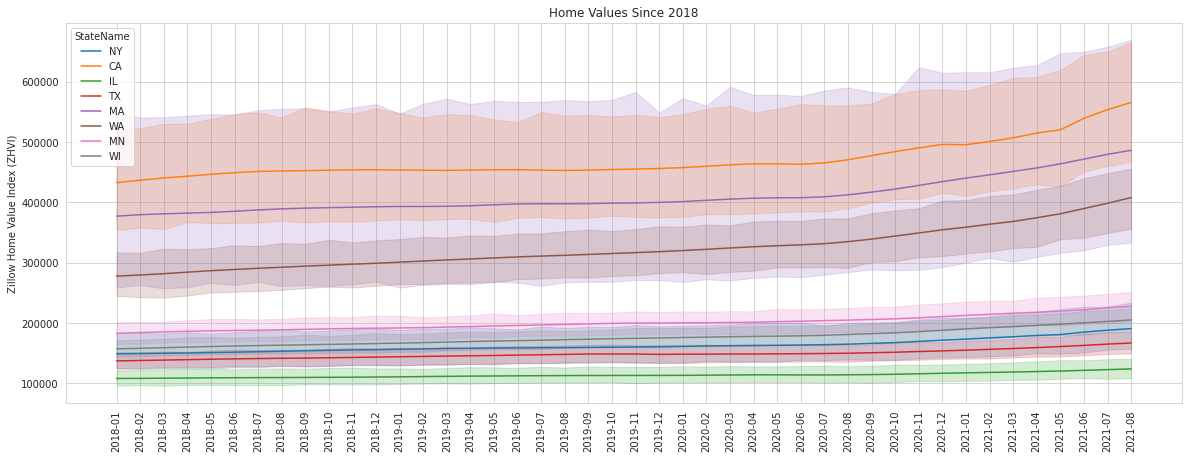

In [152]:
plt.figure(figsize=(20,7))
sns.lineplot(data = us_zhvi, x = "month", y = "value",hue = 'StateName')
plt.xticks(rotation = 'vertical')
plt.xlabel("")
plt.ylabel("Zillow Home Value Index (ZHVI)")
plt.title("Home Values Since 2018")
plt.show()

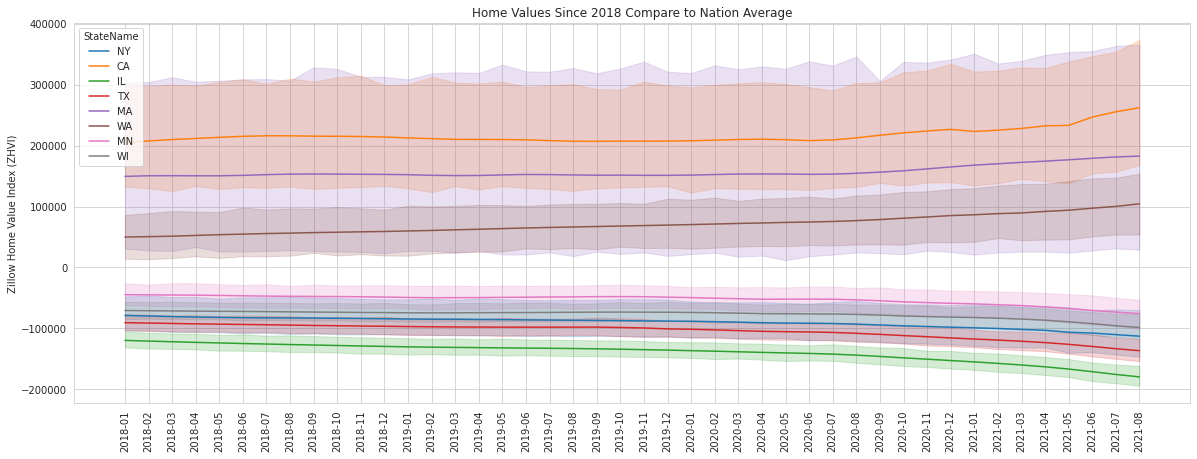

In [153]:
plt.figure(figsize=(20,7))
sns.lineplot(data = us_zhvi, x = "month", y = "diff",hue = 'StateName')
plt.xticks(rotation = 'vertical')
plt.xlabel("")
plt.ylabel("Zillow Home Value Index (ZHVI)")
plt.title("Home Values Since 2018 Compare to Nation Average")
plt.show()

In [154]:
#time series modeling
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

In [155]:
test.head()

,id,RegionID,RegionName,StateName,Type,variable,value
0,0,102001,United States,Nationwide,home_values,2018-01,227448.0
1,1,394913,"New York, NY",NY,home_values,2018-01,458229.0
2,2,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-01,640218.0
3,3,394463,"Chicago, IL",IL,home_values,2018-01,234512.0
4,4,394514,"Dallas-Fort Worth, TX",TX,home_values,2018-01,235550.0


In [156]:
pivot_housing_df.describe()

,RegionID,value
count,52976.00,5.26e+04
mean,411994.65,1.76e+05
std,80763.30,1.53e+05
min,102001.00,5.85e+02
25%,394531.75,9.69e+04
50%,394807.00,1.47e+05
75%,395045.00,2.31e+05
max,753929.00,1.79e+06


In [157]:
pivot_housing_df[pivot_housing_df.isna().any(axis=1)]

,RegionID,RegionName,StateName,Type,month,value
271,394428,"Burlington, NC",NC,home_values,2018-01,NaN
304,394810,"Lumberton, NC",NC,home_values,2018-01,NaN
466,394744,"Key West, FL",FL,home_values,2018-01,NaN
505,394305,"Alamogordo, NM",NM,home_values,2018-01,NaN
548,753920,"Sonora, CA",CA,home_values,2018-01,NaN
...,...,...,...,...,...,...
52851,753906,"North Port-Sarasota-Bradenton, FL",FL,listing_price,2021-08,NaN
52856,394484,"Colorado Springs, CO",CO,listing_price,2021-08,NaN
52860,394440,"Fort Myers, FL",FL,listing_price,2021-08,NaN
52865,394931,"Ogden, UT",UT,listing_price,2021-08,NaN


In [158]:
import plotly.graph_objects as go

In [159]:
#testHV = pd.DataFrame(Type='home_values')

# testHV = test[test["Type"] == 'home_values']
# testHV.shape


In [160]:
# testHVNationwide = testHV[testHV["StateName"] == 'Nationwide']
# testHVNationwide.shape

In [161]:
# testHVNationwide.isna().sum()

In [162]:
# testHVNationwidedrop = testHVNationwide.dropna()
# testHVNationwidedrop.shape

In [163]:
# testHVNationwidedrop


In [164]:
# adfuller(testHVNationwidedrop['value'])
# diff = testHVNationwidedrop['value'].diff()
# newdiff = diff.dropna()
# newdiff

In [165]:
# arma44 = ARMA(tuple(testHVNationwidedrop['value']), (0,1)).fit()
# arma44.summary()

In [166]:
# predsarma44 = arma44.fittedvalues
# predsarma44

In [167]:
# import numpy as np
# practice = pd.DataFrame(predsarma44, columns = ['predict'])
# practice


In [168]:
# new = pd.concat([testHVNationwidedrop.reset_index(drop=True), practice.reset_index(drop=True)],axis=1)

# new


In [169]:
# X = new['value']
# y = new['value']
# olsmod = sm.OLS(y, X)
# olsres = olsmod.fit()
# # print(olsres.summary())

In [170]:
# ypred = olsres.predict(X)
# print(ypred)

In [171]:
# x1n = np.random.randint(200000,300000,size=43)
# print(x1n)
# x2n = np.random.randint(300000,400000,size=43)
# x3n = np.random.randint(100000,400000,size=43)
# x4n = new['value']
# Xnew = np.column_stack((x3n, x4n))
# A = np.asarray(Xnew).reshape(-1)
# print(A.shape)
# ynewpred =  olsres.predict(A) # predict out of sample
# print(ynewpred)



In [172]:
# OLSpred = pd.DataFrame(ynewpred, columns = ['OLSpred'])
# OLSpred



In [173]:
# new2 = pd.concat([new.reset_index(drop=True), OLSpred.reset_index(drop=True)],axis=1)
# new2

In [174]:
# plt.figure(figsize=(20,7))
# sns.lineplot(data = new2, x = "variable", y = "value", label='National Home Values')
# sns.lineplot(data = new2, x = "variable", y = "OLSpred", label='OLSPrediction(artificial data)')
# sns.lineplot(data = new2, x = "variable", y = "predict", label='ARMAPrediction')
# plt.xticks(rotation = 'vertical')
# plt.xlabel("")
# plt.ylabel("Zillow Home Value ")
# plt.title("Home Values Since 2018")
# plt.show()

In [175]:
# plt.figure(figsize=(20,7))
# sns.lineplot(data = new, x = "variable", y = "value", label='National Home Values')
# sns.lineplot(data = new, x = "variable", y = "predict", label='Prediction')
# plt.xticks(rotation = 'vertical')
# plt.xlabel("")
# plt.ylabel("Zillow Home Value ")
# plt.title("Home Values Since 2018")
# plt.show()

# Economics

Emploment

In [176]:
new_df #Los Angeles-Long Beach-Anaheim, CA MSA


,MetroRegionID_Zillow,Area,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
0,394333.0,"Anniston-Oxford-Jacksonville, AL MSA",1990.0,1.0,51709,48084,3625,7
1,394351.0,"Auburn-Opelika, AL MSA",1990.0,1.0,44426,41104,3322,7.5
2,394388.0,"Birmingham-Hoover, AL MSA",1990.0,1.0,460283,435924,24359,5.3
3,394519.0,"Daphne-Fairhope-Foley, AL MSA",1990.0,1.0,46320,43881,2439,5.3
4,394523.0,"Decatur, AL MSA",1990.0,1.0,65563,61215,4348,6.6
...,...,...,...,...,...,...,...,...
140571,395011.0,"Racine, WI MSA",2021.0,10.0,97663,93707,3956,4.1
140572,395089.0,"Sheboygan, WI MSA",2021.0,10.0,63822,62292,1530,2.4
140573,395215.0,"Wausau, WI MSA",2021.0,10.0,73760,72020,1740,2.4
140574,394445.0,"Casper, WY MSA",2021.0,10.0,39506,37798,1708,4.3


In [177]:
#LA employment
LA_employment = new_df.loc[(new_df['Area']== 'Los Angeles-Long Beach-Anaheim, CA MSA') & (new_df['Year'] >= 2018.0)]
LA_employment

,MetroRegionID_Zillow,Area,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
123680,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,1.0,6706405,6418061,288344,4.3
124048,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,2.0,6709861,6421748,288113,4.3
124416,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,3.0,6714147,6426461,287686,4.3
124784,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,4.0,6715959,6429480,286479,4.3
125152,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,5.0,6713624,6428874,284750,4.2
125520,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,6.0,6708625,6425767,282858,4.2
125888,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,7.0,6703452,6422280,281172,4.2
126256,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,8.0,6701275,6420387,280888,4.2
126624,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,9.0,6703237,6421176,282061,4.2
126992,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,10.0,6708655,6424539,284116,4.2


In [178]:
Year = ["2018-01","2018-02","2018-03","2018-04","2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12","2019-01",
        "2019-02","2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12",
        "2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12",
        "2021-01","2021-02","2021-03","2021-04","2021-05","2021-06","2021-07","2021-08","2021-09","2021-10"]
Year
LA_employment['month'] = Year
LA_employment
LA_employment.Employment = LA_employment.Employment.astype(float)
LA_employment.Unemployment = LA_employment.Unemployment.astype(float)
dataTypeSeries2 = LA_employment.dtypes
print(dataTypeSeries2)

MetroRegionID_Zillow    float64
Area                     object
Year                    float64
Month                   float64
Civilian Labor Force     object
Employment              float64
Unemployment            float64
Unemployment Rate        object
month                    object
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **SUBHANKAR USE LA_EMPLOYMENT month IS THE CORRECT COLUMN**

In [179]:
LA_employment

,MetroRegionID_Zillow,Area,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate,month
123680,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,1.0,6706405,6.42e+06,2.88e+05,4.3,2018-01
124048,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,2.0,6709861,6.42e+06,2.88e+05,4.3,2018-02
124416,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,3.0,6714147,6.43e+06,2.88e+05,4.3,2018-03
124784,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,4.0,6715959,6.43e+06,2.86e+05,4.3,2018-04
125152,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,5.0,6713624,6.43e+06,2.85e+05,4.2,2018-05
125520,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,6.0,6708625,6.43e+06,2.83e+05,4.2,2018-06
125888,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,7.0,6703452,6.42e+06,2.81e+05,4.2,2018-07
126256,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,8.0,6701275,6.42e+06,2.81e+05,4.2,2018-08
126624,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,9.0,6703237,6.42e+06,2.82e+05,4.2,2018-09
126992,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,10.0,6708655,6.42e+06,2.84e+05,4.2,2018-10


In [180]:
column = LA_employment["Employment"]
max_value = column.min()
print(max_value)

5076225.0


Housing

Home values

In [181]:
#pivot_housing_df = pd.melt(all_housing, id_vars = ['RegionID','RegionName','StateName','Type'],  value_vars  = new_date, var_name='month')
#pivot_housing_df['month'] = pd.to_datetime(pivot_housing_df['month']).dt.date.apply(lambda x: x.strftime('%Y-%m'))
#pivot_housing_df.iloc[: , :10].head()

In [182]:
pivot_housing_df

,RegionID,RegionName,StateName,Type,month,value
0,102001,United States,Nationwide,home_values,2018-01,227448.0
1,394913,"New York, NY",NY,home_values,2018-01,458229.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-01,640218.0
3,394463,"Chicago, IL",IL,home_values,2018-01,234512.0
4,394514,"Dallas-Fort Worth, TX",TX,home_values,2018-01,235550.0
...,...,...,...,...,...,...
52971,394549,"Durham, NC",NC,rental_rate,2021-08,1479.0
52972,394995,"Port St. Lucie, FL",FL,rental_rate,2021-08,1937.0
52973,394602,"Fort Collins, CO",CO,rental_rate,2021-08,1639.0
52974,394405,"Boulder, CO",CO,rental_rate,2021-08,2077.0


In [183]:
#inventory = pivot_housing_df[(pivot_housing_df["Type"] == inventory)]

In [184]:
#Home Values
LA_home_values = pivot_housing_df.loc[(pivot_housing_df['RegionName']== 'Los Angeles-Long Beach-Anaheim, CA') & (pivot_housing_df['Type']== 'home_values')]
column = LA_home_values["value"]
max_value = column.min()
print(max_value)

640218.0


In [185]:
dataTypeSeries = LA_home_values.dtypes
print(dataTypeSeries)

RegionID        int64
RegionName     object
StateName      object
Type           object
month          object
value         float64
dtype: object


In [186]:
newtest = pd.merge(LA_home_values, LA_employment, on = ['month'], how = 'left')
newtest.head()


,RegionID,RegionName,StateName,Type,month,value,MetroRegionID_Zillow,Area,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
0,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-01,640218.0,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,1.0,6706405,6.42e+06,288344.0,4.3
1,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-02,645391.0,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,2.0,6709861,6.42e+06,288113.0,4.3
2,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-03,650415.0,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,3.0,6714147,6.43e+06,287686.0,4.3
3,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-04,654963.0,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,4.0,6715959,6.43e+06,286479.0,4.3
4,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-05,657513.0,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,5.0,6713624,6.43e+06,284750.0,4.2


In [187]:
testr = newtest[['Unemployment Rate']]

newtest2 = newtest.rename(columns={"Unemployment Rate": "UR"})
print(newtest2)

    RegionID                          RegionName StateName         Type  \
0     753899  Los Angeles-Long Beach-Anaheim, CA        CA  home_values   
1     753899  Los Angeles-Long Beach-Anaheim, CA        CA  home_values   
2     753899  Los Angeles-Long Beach-Anaheim, CA        CA  home_values   
3     753899  Los Angeles-Long Beach-Anaheim, CA        CA  home_values   
4     753899  Los Angeles-Long Beach-Anaheim, CA        CA  home_values   
5     753899  Los Angeles-Long Beach-Anaheim, CA        CA  home_values   
6     753899  Los Angeles-Long Beach-Anaheim, CA        CA  home_values   
7     753899  Los Angeles-Long Beach-Anaheim, CA        CA  home_values   
8     753899  Los Angeles-Long Beach-Anaheim, CA        CA  home_values   
9     753899  Los Angeles-Long Beach-Anaheim, CA        CA  home_values   
10    753899  Los Angeles-Long Beach-Anaheim, CA        CA  home_values   
11    753899  Los Angeles-Long Beach-Anaheim, CA        CA  home_values   
12    753899  Los Angeles

<Figure size 1440x504 with 0 Axes>

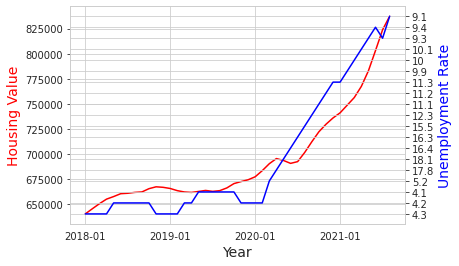

<Figure size 432x288 with 0 Axes>

In [215]:
plt.figure(figsize=(20,7))
x_ticks = ["2018-01", "2019-01", "2020-01", "2021-01"]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(newtest2.month, newtest2.value,color="red")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Housing Value",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(newtest2.month, newtest2.UR, color="blue")
ax2.set_ylabel("Unemployment Rate",color="blue",fontsize=14)
plt.xticks(ticks=x_ticks)
plt.show()
plt.savefig("/content/drive/Shareddrives/CSCI 5707 Group 8/Figures/CA Unemployment Rate.png")

<Figure size 1440x504 with 0 Axes>

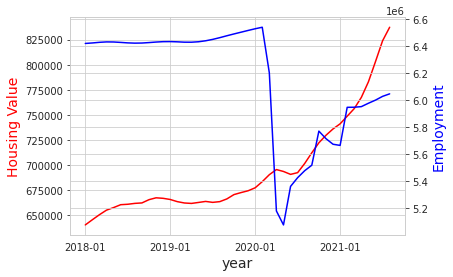

In [216]:
plt.figure(figsize=(20,7))
x_ticks = ["2018-01", "2019-01", "2020-01", "2021-01"]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(newtest.month, newtest.value,color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Housing Value",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(newtest.month, newtest.Employment, color="blue")
ax2.set_ylabel("Employment",color="blue",fontsize=14)
plt.xticks(ticks=x_ticks)
plt.show()

<Figure size 1440x504 with 0 Axes>

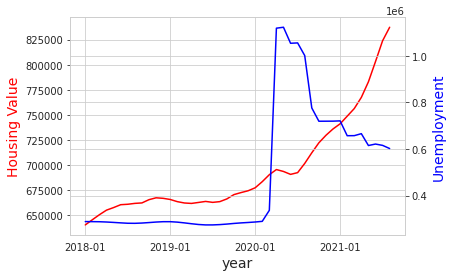

In [190]:
plt.figure(figsize=(20,7))
x_ticks = ["2018-01", "2019-01", "2020-01", "2021-01"]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(newtest.month, newtest.value,color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Housing Value",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(newtest.month, newtest.Unemployment, color="blue")
ax2.set_ylabel("Unemployment",color="blue",fontsize=14)
plt.xticks(ticks=x_ticks)
plt.show()

BEA

In [191]:
GDP = pd.read_excel('/content/drive/Shareddrives/CSCI 5707 Group 8/Project/Zillow Data/download-12.xlsx')
#GDP = '/content/drive/Shareddrives/CSCI 5707 Group 8/Project/BEA_Data/download-12'

In [192]:
print(GDP)

                                               GeoFips  \
0                                                  998   
1                                                10180   
2                                                10420   
3                                                10500   
4                                                10540   
..                                                 ...   
385                                Legend / Footnotes:   
386  * Broomfield County, CO, was created from part...   
387  * Virginia combination areas consist of one or...   
388  Metropolitan Areas are defined (geographically...   
389  Last updated: December 8, 2021 -- new statisti...   

                                               GeoName      2018      2019  \
0                 United States (Metropolitan Portion)  1.84e+10  1.92e+10   
1          Abilene, TX (Metropolitan Statistical Area)  7.28e+06  7.70e+06   
2            Akron, OH (Metropolitan Statistical Area)  3.71e+07  3.8

In [193]:

LAGDP = GDP.loc[(GDP['GeoName']== 'Los Angeles-Long Beach-Anaheim, CA (Metropolitan Statistical Area)')]
LAGDP


,GeoFips,GeoName,2018,2019,2020
211,31080,"Los Angeles-Long Beach-Anaheim, CA (Metropolit...",1.01e+09,1.06e+09,1.01e+09


In [194]:
pivot_LA = pd.melt(LAGDP, id_vars = ['GeoName','GeoFips'],  var_name='Year', value_name='Values')
pivot_LA

,GeoName,GeoFips,Year,Values
0,"Los Angeles-Long Beach-Anaheim, CA (Metropolit...",31080,2018,1.01e+09
1,"Los Angeles-Long Beach-Anaheim, CA (Metropolit...",31080,2019,1.06e+09
2,"Los Angeles-Long Beach-Anaheim, CA (Metropolit...",31080,2020,1.01e+09


In [195]:
pivot_LA.Values = pivot_LA.Values.astype(float)
dataTypeSeriespivot = pivot_LA.dtypes
print(dataTypeSeriespivot)

GeoName     object
GeoFips     object
Year        object
Values     float64
dtype: object


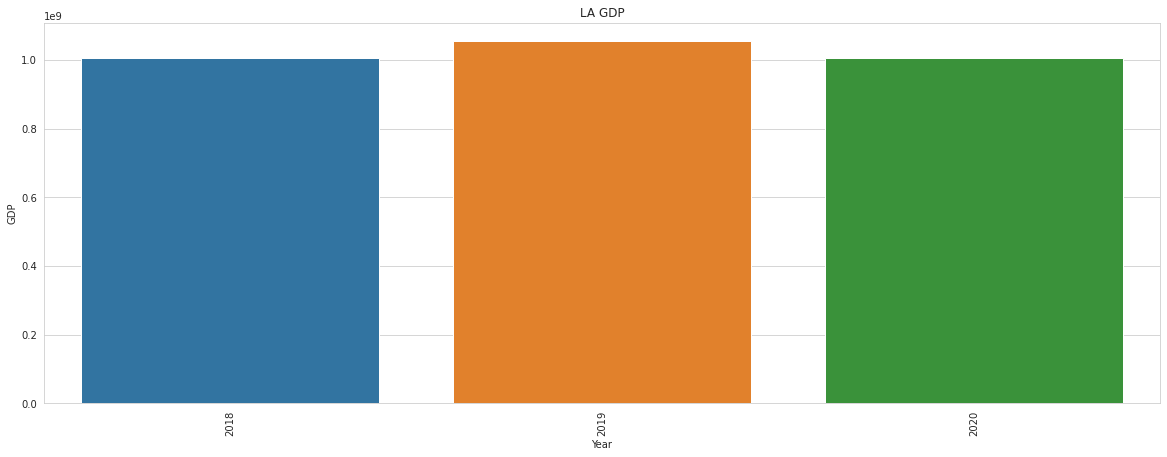

In [196]:
plt.figure(figsize=(20,7))
sns.barplot(data = pivot_LA, x = "Year", y = "Values")
plt.xticks(rotation = 'vertical')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("LA GDP")
plt.show()

Inventory and population statistics

In [197]:
LA_home1 = pivot_housing_df.loc[(pivot_housing_df['RegionName']== 'Los Angeles-Long Beach-Anaheim, CA') & (pivot_housing_df['Type']== 'home_values')]
LA_home2 = pivot_housing_df.loc[(pivot_housing_df['RegionName']== 'Los Angeles-Long Beach-Anaheim, CA')& (pivot_housing_df['Type']== 'inventory_counts')]
LA_home3 = pd.merge(LA_home1, LA_home2, on = ['month'], how = 'left')
LA_homeR = pivot_housing_df.loc[(pivot_housing_df['RegionName']== 'Los Angeles-Long Beach-Anaheim, CA')& (pivot_housing_df['Type']== 'rental_rate')]
LA_home4 = pd.merge(LA_home3, LA_homeR, on = ['month'], how = 'left')
LA_home4.head()


,RegionID_x,RegionName_x,StateName_x,Type_x,month,value_x,RegionID_y,RegionName_y,StateName_y,Type_y,value_y,RegionID,RegionName,StateName,Type,value
0,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-01,640218.0,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,20085.0,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,rental_rate,2215.0
1,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-02,645391.0,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,19926.0,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,rental_rate,2222.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-03,650415.0,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,21887.0,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,rental_rate,2230.0
3,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-04,654963.0,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,23809.0,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,rental_rate,2238.0
4,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,home_values,2018-05,657513.0,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,25775.0,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,rental_rate,2246.0


<Figure size 1440x504 with 0 Axes>

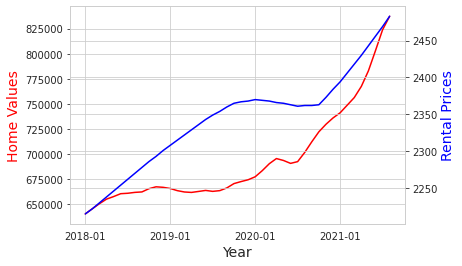

In [198]:
plt.figure(figsize=(20,7))
x_ticks = ["2018-01", "2019-01", "2020-01", "2021-01"]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(LA_home4.month, LA_home4.value_x,color="red")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Home Values",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(LA_home4.month, LA_home4.value, color="blue")
ax2.set_ylabel("Rental Prices",color="blue",fontsize=14)
plt.xticks(ticks=x_ticks)
plt.show()

<Figure size 1440x504 with 0 Axes>

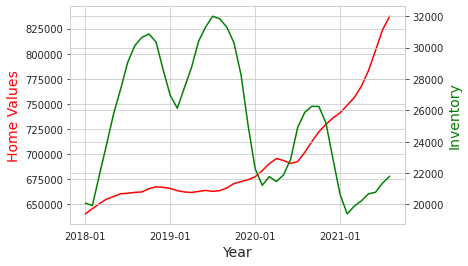

In [199]:
plt.figure(figsize=(20,7))
x_ticks = ["2018-01", "2019-01", "2020-01", "2021-01"]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(LA_home3.month, LA_home3.value_x,color="red")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Home Values",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(LA_home3.month, LA_home3.value_y, color="green")
ax2.set_ylabel("Inventory",color="green",fontsize=14)
plt.xticks(ticks=x_ticks)
plt.show()

In [200]:
#Inventory
LA_home_inventory = pivot_housing_df.loc[(pivot_housing_df['RegionName']== 'Los Angeles-Long Beach-Anaheim, CA') & (pivot_housing_df['Type']== 'inventory_counts')]
LA_home_inventory.head()

,RegionID,RegionName,StateName,Type,month,value
911,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,2018-01,20085.0
2115,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,2018-02,19926.0
3319,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,2018-03,21887.0
4523,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,2018-04,23809.0
5727,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,2018-05,25775.0


In [201]:
laempinv = pd.merge(LA_home_inventory, LA_employment, on = ['month'], how = 'left')
laempinv.head()

,RegionID,RegionName,StateName,Type,month,value,MetroRegionID_Zillow,Area,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
0,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,2018-01,20085.0,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,1.0,6706405,6.42e+06,288344.0,4.3
1,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,2018-02,19926.0,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,2.0,6709861,6.42e+06,288113.0,4.3
2,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,2018-03,21887.0,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,3.0,6714147,6.43e+06,287686.0,4.3
3,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,2018-04,23809.0,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,4.0,6715959,6.43e+06,286479.0,4.3
4,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,inventory_counts,2018-05,25775.0,753899.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018.0,5.0,6713624,6.43e+06,284750.0,4.2


<Figure size 1440x504 with 0 Axes>

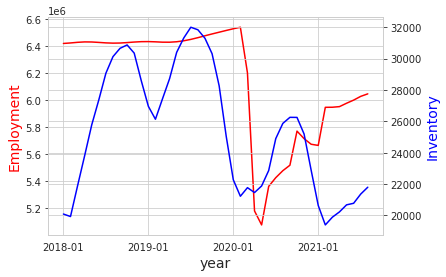

In [202]:
plt.figure(figsize=(20,7))
x_ticks = ["2018-01", "2019-01", "2020-01", "2021-01"]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(laempinv.month, laempinv.Employment,color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Employment",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(laempinv.month, laempinv.value, color="blue")
ax2.set_ylabel("Inventory",color="blue",fontsize=14)
plt.xticks(ticks=x_ticks)
plt.show()

MINNESOTA

In [203]:
#MN employment
MN_employment = new_df.loc[(new_df['Area']== 'Minneapolis-St. Paul-Bloomington, MN-WI MSA') & (new_df['Year'] >= 2018.0)]
MN_employment.head()

,MetroRegionID_Zillow,Area,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
123823,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,1.0,1992181,1935069,57112,2.9
124191,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,2.0,1992835,1936159,56676,2.8
124559,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,3.0,1993312,1937155,56157,2.8
124927,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,4.0,1992941,1937557,55384,2.8
125295,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,5.0,1991822,1937277,54545,2.7


In [204]:
Year = ["2018-01","2018-02","2018-03","2018-04","2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12","2019-01",
        "2019-02","2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12",
        "2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12",
        "2021-01","2021-02","2021-03","2021-04","2021-05","2021-06","2021-07","2021-08","2021-09","2021-10"]
Year
MN_employment['month'] = Year
MN_employment
MN_employment.Employment = MN_employment.Employment.astype(float)
MN_employment.Unemployment = MN_employment.Unemployment.astype(float)
dataTypeSeriesMN = MN_employment.dtypes
print(dataTypeSeriesMN)

MetroRegionID_Zillow    float64
Area                     object
Year                    float64
Month                   float64
Civilian Labor Force     object
Employment              float64
Unemployment            float64
Unemployment Rate        object
month                    object
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **SUBHANKAR USE MN_EMPLOYMENT MONTH IS THE CORRECT TIME**

In [205]:
MN_employment

,MetroRegionID_Zillow,Area,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate,month
123823,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,1.0,1992181,1.94e+06,57112.0,2.9,2018-01
124191,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,2.0,1992835,1.94e+06,56676.0,2.8,2018-02
124559,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,3.0,1993312,1.94e+06,56157.0,2.8,2018-03
124927,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,4.0,1992941,1.94e+06,55384.0,2.8,2018-04
125295,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,5.0,1991822,1.94e+06,54545.0,2.7,2018-05
125663,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,6.0,1990923,1.94e+06,53759.0,2.7,2018-06
126031,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,7.0,1991066,1.94e+06,53105.0,2.7,2018-07
126399,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,8.0,1993026,1.94e+06,53035.0,2.7,2018-08
126767,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,9.0,1996583,1.94e+06,53776.0,2.7,2018-09
127135,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,10.0,2000971,1.95e+06,55157.0,2.8,2018-10


In [206]:
MN_home1 = pivot_housing_df.loc[(pivot_housing_df['RegionName']== 'Minneapolis-St Paul, MN') & (pivot_housing_df['Type']== 'home_values')]
MN_home2 = pivot_housing_df.loc[(pivot_housing_df['RegionName']== 'Minneapolis-St Paul, MN')& (pivot_housing_df['Type']== 'inventory_counts')]
MN_homeR = pivot_housing_df.loc[(pivot_housing_df['RegionName']== 'Minneapolis-St Paul, MN')& (pivot_housing_df['Type']== 'rental_rate')]
MN_home3 = pd.merge(MN_home1, MN_home2, on = ['month'], how = 'left')
MN_home4 = pd.merge(MN_home3, MN_homeR, on = ['month'], how = 'left')
MN_home4.head()

,RegionID_x,RegionName_x,StateName_x,Type_x,month,value_x,RegionID_y,RegionName_y,StateName_y,Type_y,value_y,RegionID,RegionName,StateName,Type,value
0,394865,"Minneapolis-St Paul, MN",MN,home_values,2018-01,269482.0,394865,"Minneapolis-St Paul, MN",MN,inventory_counts,10330.0,394865,"Minneapolis-St Paul, MN",MN,rental_rate,1405.0
1,394865,"Minneapolis-St Paul, MN",MN,home_values,2018-02,272054.0,394865,"Minneapolis-St Paul, MN",MN,inventory_counts,9544.0,394865,"Minneapolis-St Paul, MN",MN,rental_rate,1410.0
2,394865,"Minneapolis-St Paul, MN",MN,home_values,2018-03,274274.0,394865,"Minneapolis-St Paul, MN",MN,inventory_counts,10344.0,394865,"Minneapolis-St Paul, MN",MN,rental_rate,1415.0
3,394865,"Minneapolis-St Paul, MN",MN,home_values,2018-04,276148.0,394865,"Minneapolis-St Paul, MN",MN,inventory_counts,11746.0,394865,"Minneapolis-St Paul, MN",MN,rental_rate,1420.0
4,394865,"Minneapolis-St Paul, MN",MN,home_values,2018-05,277399.0,394865,"Minneapolis-St Paul, MN",MN,inventory_counts,13566.0,394865,"Minneapolis-St Paul, MN",MN,rental_rate,1424.0


<Figure size 1440x504 with 0 Axes>

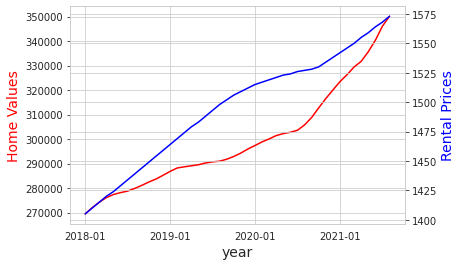

In [207]:
plt.figure(figsize=(20,7))
x_ticks = ["2018-01", "2019-01", "2020-01", "2021-01"]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(MN_home4.month, MN_home4.value_x,color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Home Values",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(MN_home4.month, MN_home4.value, color="blue")
ax2.set_ylabel("Rental Prices",color="blue",fontsize=14)
plt.xticks(ticks=x_ticks)
plt.show()

<Figure size 1440x504 with 0 Axes>

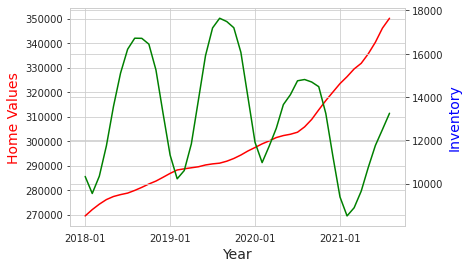

In [208]:
plt.figure(figsize=(20,7))
x_ticks = ["2018-01", "2019-01", "2020-01", "2021-01"]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(MN_home4.month, MN_home4.value_x,color="red")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Home Values",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(MN_home4.month, MN_home4.value_y, color="green")
ax2.set_ylabel("Inventory",color="blue",fontsize=14)
plt.xticks(ticks=x_ticks)
plt.show()

In [209]:
MNempvalues = pd.merge(MN_home1, MN_employment, on = ['month'], how = 'left')
MNempvalues.head()

,RegionID,RegionName,StateName,Type,month,value,MetroRegionID_Zillow,Area,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
0,394865,"Minneapolis-St Paul, MN",MN,home_values,2018-01,269482.0,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,1.0,1992181,1.94e+06,57112.0,2.9
1,394865,"Minneapolis-St Paul, MN",MN,home_values,2018-02,272054.0,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,2.0,1992835,1.94e+06,56676.0,2.8
2,394865,"Minneapolis-St Paul, MN",MN,home_values,2018-03,274274.0,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,3.0,1993312,1.94e+06,56157.0,2.8
3,394865,"Minneapolis-St Paul, MN",MN,home_values,2018-04,276148.0,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,4.0,1992941,1.94e+06,55384.0,2.8
4,394865,"Minneapolis-St Paul, MN",MN,home_values,2018-05,277399.0,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,5.0,1991822,1.94e+06,54545.0,2.7


In [210]:
mnt = MNempvalues[['Unemployment Rate']]

MNempvalues2 = MNempvalues.rename(columns={"Unemployment Rate": "UR"})
print(MNempvalues2)

    RegionID               RegionName StateName         Type    month  \
0     394865  Minneapolis-St Paul, MN        MN  home_values  2018-01   
1     394865  Minneapolis-St Paul, MN        MN  home_values  2018-02   
2     394865  Minneapolis-St Paul, MN        MN  home_values  2018-03   
3     394865  Minneapolis-St Paul, MN        MN  home_values  2018-04   
4     394865  Minneapolis-St Paul, MN        MN  home_values  2018-05   
5     394865  Minneapolis-St Paul, MN        MN  home_values  2018-06   
6     394865  Minneapolis-St Paul, MN        MN  home_values  2018-07   
7     394865  Minneapolis-St Paul, MN        MN  home_values  2018-08   
8     394865  Minneapolis-St Paul, MN        MN  home_values  2018-09   
9     394865  Minneapolis-St Paul, MN        MN  home_values  2018-10   
10    394865  Minneapolis-St Paul, MN        MN  home_values  2018-11   
11    394865  Minneapolis-St Paul, MN        MN  home_values  2018-12   
12    394865  Minneapolis-St Paul, MN        MN  ho

<Figure size 1440x504 with 0 Axes>

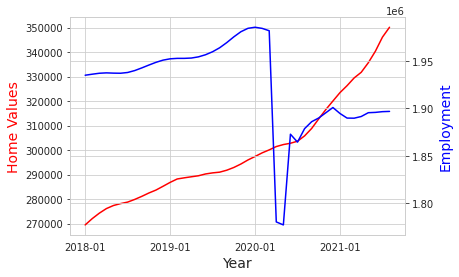

In [219]:
plt.figure(figsize=(20,7))
x_ticks = ["2018-01", "2019-01", "2020-01", "2021-01"]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(MNempvalues.month, MNempvalues.value,color="red")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Home Values",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(MNempvalues.month, MNempvalues.Employment, color="blue")
ax2.set_ylabel("Employment",color="blue",fontsize=14)
plt.xticks(ticks=x_ticks)
plt.show()

In [212]:
MNempinv = pd.merge(MN_home2, MN_employment, on = ['month'], how = 'left')
MNempinv.head()

,RegionID,RegionName,StateName,Type,month,value,MetroRegionID_Zillow,Area,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
0,394865,"Minneapolis-St Paul, MN",MN,inventory_counts,2018-01,10330.0,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,1.0,1992181,1.94e+06,57112.0,2.9
1,394865,"Minneapolis-St Paul, MN",MN,inventory_counts,2018-02,9544.0,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,2.0,1992835,1.94e+06,56676.0,2.8
2,394865,"Minneapolis-St Paul, MN",MN,inventory_counts,2018-03,10344.0,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,3.0,1993312,1.94e+06,56157.0,2.8
3,394865,"Minneapolis-St Paul, MN",MN,inventory_counts,2018-04,11746.0,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,4.0,1992941,1.94e+06,55384.0,2.8
4,394865,"Minneapolis-St Paul, MN",MN,inventory_counts,2018-05,13566.0,394865.0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018.0,5.0,1991822,1.94e+06,54545.0,2.7


<Figure size 1440x504 with 0 Axes>

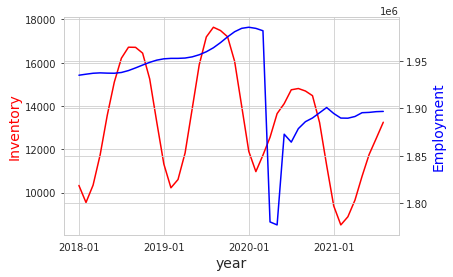

In [213]:
plt.figure(figsize=(20,7))
x_ticks = ["2018-01", "2019-01", "2020-01", "2021-01"]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(MNempinv.month, MNempinv.value,color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Inventory",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(MNempinv.month, MNempinv.Employment, color="blue")
ax2.set_ylabel("Employment",color="blue",fontsize=14)
plt.xticks(ticks=x_ticks)
plt.show()